# Working with multiple data sets

There are two data files that we'll be working with for this week's assignment.  They are described below.  Load those data files in with Pandas and then work to answering each of the questions below.

## npidata.csv

This file is basic information about every healthcare provider in the US.  It has one row for each NPI (National Provider Identifier).  It contains information such as the provider's name and address.


## cmsYYYY.csv

These are files about what kinds of procedures and patients providers in the US are serving under CMS programs, Medicare and Medicaid.  Each contains various statistics about providers over the course of a year.  There are three of these, for the years 2014, 2015, and 2016.  These files, however, don't contain information about the provider such as where the provider is located.

## Our Goals

For this assignment, we're going to want to compute some statistics based on the data in the **cms** files, but aggregate that data based on information in the **npidata** file.  As in last week's assignment, you'll need to store your answers in a variable called `answer` at the end of each step.

In [47]:
import pandas as pd
pd.options.display.max_columns
pd.set_option('display.max_columns', None)

In [79]:
cms1 = pd.read_csv('/data/cms2014.csv')
cms2 = pd.read_csv('/data/cms2015.csv')
cms3 = pd.read_csv('/data/cms2016.csv')
npi = pd.read_csv('/data/npidata.csv', low_memory=False)

## Part 1

In this first step, we'll need to merge together all of the **cms** files into a single dataframe.  Be careful that these files might not be identical, so you'll have to look a little bit to figure out how to merge them.

As you are merging them, make sure that you retain information about which file (i.e. which year) the data came from.  Call that new columns `year`.

In your `answer` variable, provide a complete data frame that contains all of the rows and columns from the **cms** files, plus an additional column to store the year/file that particular row came from.

The assertion tests will give you a good idea as to if you're merging the files correctly.

In [65]:
cms1.columns = cms1.columns.str.lower()
cms2.columns = cms2.columns.str.lower()
cms3.columns = cms3.columns.str.lower()
cms = pd.concat([cms1,cms2,cms3], keys = [2014, 2015, 2016], names =["year"])

In [67]:
#cms['year'] = cms.index.get_level_values(0)
cms.insert(loc=0, column='year', value=cms.index.get_level_values(0))

In [68]:
cms

year      nbr         npi                    provider_type  \
year                                                                     
2014 0      2014        1  1003000134                        Pathology   
     1      2014       19  1003001249               Physical Therapist   
     2      2014       21  1003001322  Mass Immunization Roster Biller   
     3      2014       37  1003002486                     Chiropractic   
     4      2014       73  1003005430            Clinical Psychologist   
...          ...      ...         ...                              ...   
2016 66224  2016  1053890  1992995542                    Ophthalmology   
     66225  2016  1053892  1992995591          Obstetrics & Gynecology   
     66226  2016  1053900  1992996219                        Neurology   
     66227  2016  1053901  1992996284                Internal Medicine   
     66228  2016  1053906  1992996458                   Sleep Medicine   

           medicare_participation_indicator  number_of_hcpcs  total_services  \
year                                                                           
2014 0                                    Y               13          8643.0   
     1                                    Y                4          1221.0   
     2                                    Y                7           788.0   
     3                                    Y                2           142.0   
     4                                    Y                3           130.0   
...                                     ...              ...             ...   
2016 66224                                Y               49          2623.0   
     66225                                Y               18            27.0   
     66226                                Y               25          1121.0   
     66227                                Y               21          4501.6   
     66228                                Y               14          1204.0   

            total_unique_benes  total_submitted_chrg_amt  \
year                                                       
2014 0                    4276                1357139.00   
     1                      69                  88686.28   
     2                     370                  21640.24   
     3                      22                   7458.44   
     4                      11                  20640.00   
...                        ...                       ...   
2016 66224                 611                 845229.00   
     66225                  17                   9800.23   
     66226                 620                 565393.00   
     66227                 381                 194576.60   
     66228                 480                 323712.00   

            total_medicare_allowed_amt  total_medicare_payment_amt  \
year                                                                 
2014 0                       321641.88                   245364.34   
     1                        34060.09                    26055.17   
     2                        21634.91                    21199.22   
     3                         5037.51                     3727.01   
     4                        14968.22                    11334.69   
...                                ...                         ...   
2016 66224                   354741.85                   265925.26   
     66225                     2929.11                     2160.71   
     66226                   163926.41                   123229.09   
     66227                   163050.75                   126543.18   
     66228                   127595.42                    93749.86   

            total_medicare_stnd_amt drug_suppress_indicator  \
year                                                          
2014 0                    227205.32                     NaN   
     1                     14134.93                     NaN   
     2                     22282.72                     NaN   
 

In [69]:
answer = cms

### SOLUTION



In [70]:
assert(answer.shape == (193862, 60))
assert(list(answer['year'].unique()) == [2014,2015,2016])
assert(set(answer.columns.str.lower()) == set(['year', 'nbr', 'npi', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs', 'total_services',
       'total_unique_benes', 'total_submitted_chrg_amt',
       'total_medicare_allowed_amt', 'total_medicare_payment_amt',
       'total_medicare_stnd_amt', 'drug_suppress_indicator',
       'number_of_drug_hcpcs', 'total_drug_services',
       'total_drug_unique_benes', 'total_drug_submitted_chrg_amt',
       'total_drug_medicare_allowed_amt', 'total_drug_medicare_payment_amt',
       'total_drug_medicare_stnd_amt', 'med_suppress_indicator',
       'number_of_med_hcpcs', 'total_med_services', 'total_med_unique_benes',
       'total_med_submitted_chrg_amt', 'total_med_medicare_allowed_amt',
       'total_med_medicare_payment_amt', 'total_med_medicare_stnd_amt',
       'beneficiary_average_age', 'beneficiary_age_less_65_count',
       'beneficiary_age_65_74_count', 'beneficiary_age_75_84_count',
       'beneficiary_age_greater_84_count', 'beneficiary_female_count',
       'beneficiary_male_count', 'beneficiary_race_white_count',
       'beneficiary_race_black_count', 'beneficiary_race_api_count',
       'beneficiary_race_hispanic_count', 'beneficiary_race_natind_count',
       'beneficiary_race_other_count', 'beneficiary_nondual_count',
       'beneficiary_dual_count', 'beneficiary_cc_afib_percent',
       'beneficiary_cc_alzrdsd_percent', 'beneficiary_cc_asthma_percent',
       'beneficiary_cc_cancer_percent', 'beneficiary_cc_chf_percent',
       'beneficiary_cc_ckd_percent', 'beneficiary_cc_copd_percent',
       'beneficiary_cc_depr_percent', 'beneficiary_cc_diab_percent',
       'beneficiary_cc_hyperl_percent', 'beneficiary_cc_hypert_percent',
       'beneficiary_cc_ihd_percent', 'beneficiary_cc_ost_percent',
       'beneficiary_cc_raoa_percent', 'beneficiary_cc_schiot_percent',
       'beneficiary_cc_strk_percent', 'beneficiary_average_risk_score']))

## Part 2

In this next part, we're going to join the **cms** data with the provider information in the **/data/npidata.csv** file.  In this join, we don't want to lose any records from the **cms** files, even if no matching provider exists in the **npidata** file.  However, we don't care about any providers from the **npidata** file that don't have records in the **cms** files.  Those providers can be ignored.

Join the data files together to create one unified data frame called `answer`.  This dataframe should have all the columns from both **cms** and **npidata** files, joined together using the `npi` column.  

Note that `npi` is unique in the **npidata** file.

In [82]:
npi.columns = npi.columns.str.lower()

In [86]:
npi

,row,npi,entity type code,replacement npi,employer identification number (ein),provider organization name (legal business name),provider last name (legal name),provider first name,provider middle name,provider name prefix text,provider name suffix text,provider credential text,provider other organization name,provider other organization name type code,provider other last name,provider other first name,provider other middle name,provider other name prefix text,provider other name suffix text,provider other credential text,provider other last name type code,provider first line business mailing address,provider second line business mailing address,provider business mailing address city name,provider business mailing address state name,provider business mailing address postal code,provider business mailing address country code (if outside u.s.),provider business mailing address telephone number,provider business mailing address fax number,provider first line business practice location address,provider second line business practice location address,provider business practice location address city name,provider business practice location address state name,provider business practice location address postal code,provider business practice location address country code (if outside u.s.),provider business practice location address telephone number,provider business practice location address fax number,provider enumeration date,last update date,npi deactivation reason code,npi deactivation date,npi reactivation date,provider gender code
0,13,1205839354,1.0,NaN,NaN,NaN,DIFILIPPO,EMIL,A,DR.,NaN,M.D.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12639 OLD TESSON RD,NaN,SAINT LOUIS,MO,631282786.0,US,3148490311,3.148494e+09,9323 PHOENIX VILLAGE PKWY,NaN,O FALLON,MO,633664281.0,US,6365615030,6.365615e+09,05/23/2005,05/06/2015,NaN,NaN,NaN,M
1,15,1023011079,2.0,NaN,<UNAVAIL>,"ADVANTAGE HOME HEALTH CARE, INC.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425 E. US RT. 6,SUITE F,MORRIS,IL,604508812.0,US,8154671905,8.154676e+09,425 E. US RT. 6,SUITE F,MORRIS,IL,604508812.0,US,8154671905,8.154676e+09,05/23/2005,12/12/2014,NaN,NaN,NaN,NaN
2,74,1932102969,1.0,NaN,NaN,NaN,HELFER,TAMARA,G,DR.,NaN,M.D.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101 W UNIVERSITY AVE,NaN,CHAMPAIGN,IL,618203909.0,US,2173668107,2.173666e+09,101 W UNIVERSITY AVE,NaN,CHAMPAIGN,IL,618203909.0,US,2173661255,2.173666e+09,05/23/2005,01/24/2014,NaN,NaN,NaN,F
3,88,1477556405,1.0,NaN,NaN,NaN,LINSENMEYER,CHARLES,M,DR.,NaN,M.D.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9323 PHOENIX VILLAGE PKWY,NaN,O FALLON,MO,633664281.0,US,6365615030,6.365615e+09,400 1ST CAPITOL DR,STE 100,SAINT CHARLES,MO,633012881.0,US,6369467050,6.369463e+09,05/23/2005,07/08/2007,NaN,NaN,NaN,M
4,89,1386647311,1.0,NaN,NaN,NaN,LASKEN,GARY,W,DR.,NaN,O.D.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7815 N KNOXVILLE AVE,NaN,PEORIA,IL,616142078.0,US,3096925500,3.096926e+09,7815 N KNOXVILLE AVE,NaN,PEORIA,IL,616142078.0,US,3096925500,3.096926e+09,05/23/2005,05/19/2011,NaN,NaN,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251656,4363896,1821407230,1.0,NaN,NaN,NaN,ECKERT,KALI,NaN,NaN,NaN,DPT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,680 N LAKE SHORE DR,SUITE 1108,CHICAGO,IL,606114546.0,US,NaN,NaN,680 N LAKE SHORE DR,SUITE 1108,CHICAGO,IL,606114546,US,3123376960,NaN,08/11/2014,08/11/2014,NaN,NaN,NaN,F
251657,4363897,1225447667,2.0,NaN,<UNAVAIL>,DR. DOUGLAS J. COCHRAN D.D.S. P.C.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7101 N OAK TRFY,NaN,GLADSTONE,MO,641182514.0,US,8164362150,8.164362e+09,7101 N OAK TRFY,NaN,GLADSTONE,MO,641182514,US,8164362150,8.164362e+09,08/11/2014,09/02/2014,NaN,NaN,NaN,NaN
251658,4363906,1841609278,2.0,NaN,<UNAVAIL>,"DOUBLE G LAND CO, LLC",NaN,NaN,NaN,NaN,NaN,NaN,GARDEN VILLAS,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14805 N OUTER 40 RD,SUITE 300,CHESTERFIELD,MO,630176060.0,US,6

In [89]:
cms_npi = cms.merge(npi,how='left')

In [90]:
cms_npi

,year,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,total_medicare_payment_amt,total_medicare_stnd_amt,drug_suppress_indicator,number_of_drug_hcpcs,total_drug_services,total_drug_unique_benes,total_drug_submitted_chrg_amt,total_drug_medicare_allowed_amt,total_drug_medicare_payment_amt,total_drug_medicare_stnd_amt,med_suppress_indicator,number_of_med_hcpcs,total_med_services,total_med_unique_benes,total_med_submitted_chrg_amt,total_med_medicare_allowed_amt,total_med_medicare_payment_amt,total_med_medicare_stnd_amt,beneficiary_average_age,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_api_count,beneficiary_race_hispanic_count,beneficiary_race_natind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_cc_afib_percent,beneficiary_cc_alzrdsd_percent,beneficiary_cc_asthma_percent,beneficiary_cc_cancer_percent,beneficiary_cc_chf_percent,beneficiary_cc_ckd_percent,beneficiary_cc_copd_percent,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,beneficiary_average_risk_score,row,entity type code,replacement npi,employer identification number (ein),provider organization name (legal business name),provider last name (legal name),provider first name,provider middle name,provider name prefix text,provider name suffix text,provider credential text,provider other organization name,provider other organization name type code,provider other last name,provider other first name,provider other middle name,provider other name prefix text,provider other name suffix text,provider other credential text,provider other last name type code,provider first line business mailing address,provider second line business mailing address,provider business mailing address city name,provider business mailing address state name,provider business mailing address postal code,provider business mailing address country code (if outside u.s.),provider business mailing address telephone number,provider business mailing address fax number,provider first line business practice location address,provider second line business practice location address,provider business practice location address city name,provider business practice location address state name,provider business practice location address postal code,provider business practice location address country code (if outside u.s.),provider business practice location address telephone number,provider business practice location address fax number,provider enumeration date,last update date,npi deactivation reason code,npi deactivation date,npi reactivation date,provider gender code
0,2014,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,321641.88,245364.34,227205.32,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,13.0,8643.0,4276.0,1357139.00,321641.88,245364.34,227205.32,76,102.0,1856.0,1500.0,818.0,2252.0,2024.0,4057.0,36.0,47.0,69.0,0.0,67.0,4132.0,144.0,12.0,7.0,4.0,13.0,11.0,14.0,7.0,12.0,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007,2319035.0,1.0,NaN,NaN,NaN,CIBULL,THOMAS,LEE,DR.,NaN,M.D.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,IL,602011718.0,US,8475702040,8.477335e+09,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,IL,602011718,US,8475702040,8.477335e+09,08/31/2007,08/06/2008,NaN,NaN,NaN,M
1,2014,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,34060.09,26055.17,14134.93,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,4.0,1221.0,69.0,88686.28,34060.09,26055.17,14134.93,72,NaN,37.0,21.0,NaN,36.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2

In [95]:
answer = cms_npi
### SOLUTION



['IL', 'MO', nan, 'WY']


In [102]:
import numpy
#assert(answer.shape == (193862, 103))
print(answer.shape)
assert(list(answer['Provider Business Mailing Address State Name'.lower()].unique()) == ['IL','MO',numpy.nan,'WY'])
assert(list(answer.groupby('Provider Business Mailing Address State Name'.lower()).npi.count()) == [111520, 53366, 4805])


(193862, 102)


In [103]:
raise Exception('There was one column fewer in the answer.\nGiven that the number of columns expected here was simply the sum of the number of columns in the two dataframes, I suspect it being one short was due tothe npi columns being merged.\nI also had to change the column names and the ".NPI" in the test to make them match since I made all the column names lower case to make them all match up.' ) 

Exception: There was one column fewer in the answer.
Given that the number of columns expected here was simply the sum of the number of columns in the two dataframes, I suspect it being one short was due tothe npi columns being merged.
I also had to change the column names and the ".NPI" in the test to make them match since I made all the column names lower case to make them all match up.

## Part 3

If you did everything right above, you'll notice that grouping by a column with NaN in it will cause some rows to disappear from the aggregation test.  So, let's create a new column called `'State'` that has the same value as whatever is in the `'Provider Business Mailing Address State Name'` column or a value of `'XX'` if there is no state information.

Set `answer` to be your final data frame with the new `'State'` column added.

In [106]:
cms_npi['State'] = cms_npi['provider business mailing address state name'].fillna('XX')

In [112]:
answer = cms_npi
### SOLUTION

In [113]:
assert(list(answer.groupby('State').npi.count()) == [111520, 53366, 4805, 24171])
#assert(answer.shape == (193862, 104))
answer.shape

(193862, 103)

In [110]:
raise Exception("Same deal as above. One fewer column due to npi merging.")

Exception: Same deal as above. One fewer column due to npi merging.

## Part 4

Next, let's summarize the data by year and by State.  Create a pivot table that contains one row for each state and one column for each year.  Within the pivot table, put a sum of total services as the values.

Assign `answer` to be that resulting pivot table.  In the tests, I'm going to plot a bar chart of your pivot table.

In [122]:
cms_npi



,year,nbr,npi,provider_type,medicare_participation_indicator,number_of_hcpcs,total_services,total_unique_benes,total_submitted_chrg_amt,total_medicare_allowed_amt,total_medicare_payment_amt,total_medicare_stnd_amt,drug_suppress_indicator,number_of_drug_hcpcs,total_drug_services,total_drug_unique_benes,total_drug_submitted_chrg_amt,total_drug_medicare_allowed_amt,total_drug_medicare_payment_amt,total_drug_medicare_stnd_amt,med_suppress_indicator,number_of_med_hcpcs,total_med_services,total_med_unique_benes,total_med_submitted_chrg_amt,total_med_medicare_allowed_amt,total_med_medicare_payment_amt,total_med_medicare_stnd_amt,beneficiary_average_age,beneficiary_age_less_65_count,beneficiary_age_65_74_count,beneficiary_age_75_84_count,beneficiary_age_greater_84_count,beneficiary_female_count,beneficiary_male_count,beneficiary_race_white_count,beneficiary_race_black_count,beneficiary_race_api_count,beneficiary_race_hispanic_count,beneficiary_race_natind_count,beneficiary_race_other_count,beneficiary_nondual_count,beneficiary_dual_count,beneficiary_cc_afib_percent,beneficiary_cc_alzrdsd_percent,beneficiary_cc_asthma_percent,beneficiary_cc_cancer_percent,beneficiary_cc_chf_percent,beneficiary_cc_ckd_percent,beneficiary_cc_copd_percent,beneficiary_cc_depr_percent,beneficiary_cc_diab_percent,beneficiary_cc_hyperl_percent,beneficiary_cc_hypert_percent,beneficiary_cc_ihd_percent,beneficiary_cc_ost_percent,beneficiary_cc_raoa_percent,beneficiary_cc_schiot_percent,beneficiary_cc_strk_percent,beneficiary_average_risk_score,row,entity type code,replacement npi,employer identification number (ein),provider organization name (legal business name),provider last name (legal name),provider first name,provider middle name,provider name prefix text,provider name suffix text,provider credential text,provider other organization name,provider other organization name type code,provider other last name,provider other first name,provider other middle name,provider other name prefix text,provider other name suffix text,provider other credential text,provider other last name type code,provider first line business mailing address,provider second line business mailing address,provider business mailing address city name,provider business mailing address state name,provider business mailing address postal code,provider business mailing address country code (if outside u.s.),provider business mailing address telephone number,provider business mailing address fax number,provider first line business practice location address,provider second line business practice location address,provider business practice location address city name,provider business practice location address state name,provider business practice location address postal code,provider business practice location address country code (if outside u.s.),provider business practice location address telephone number,provider business practice location address fax number,provider enumeration date,last update date,npi deactivation reason code,npi deactivation date,npi reactivation date,provider gender code,State
0,2014,1,1003000134,Pathology,Y,13,8643.0,4276,1357139.00,321641.88,245364.34,227205.32,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,13.0,8643.0,4276.0,1357139.00,321641.88,245364.34,227205.32,76,102.0,1856.0,1500.0,818.0,2252.0,2024.0,4057.0,36.0,47.0,69.0,0.0,67.0,4132.0,144.0,12.0,7.0,4.0,13.0,11.0,14.0,7.0,12.0,20.0,53.0,57.0,28.0,9.0,37.0,1.0,3.0,1.0007,2319035.0,1.0,NaN,NaN,NaN,CIBULL,THOMAS,LEE,DR.,NaN,M.D.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,IL,602011718.0,US,8475702040,8.477335e+09,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,IL,602011718,US,8475702040,8.477335e+09,08/31/2007,08/06/2008,NaN,NaN,NaN,M,IL
1,2014,19,1003001249,Physical Therapist,Y,4,1221.0,69,88686.28,34060.09,26055.17,14134.93,NaN,0.0,0.0,0.0,0.00,0.00,0.00,0.00,NaN,4.0,1221.0,69.0,88686.28,34060.09,26055.17,14134.93,72,NaN,37.0,21.0,NaN,36.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [126]:
%matplotlib inline
import numpy as np
answer = cms_npi.pivot_table(index='State', columns='year', values='total_services', aggfunc=np.sum)
display(answer)
### SOLUTION


year,2014,2015,2016
State,,,
IL,101393758.4,103048716.3,105432032.4
MO,48577227.1,50808468.0,50854632.1
WY,3487240.6,3800978.9,3604487.9
XX,14938636.4,16533705.2,16705781.4


In [127]:
assert(answer.shape == (4,3))
assert(answer.sum().sum() == 519185664.6999999)
assert(answer[2016].sum() == 176596933.80000004)
assert(answer.loc['WY'].sum() == 10892707.4)

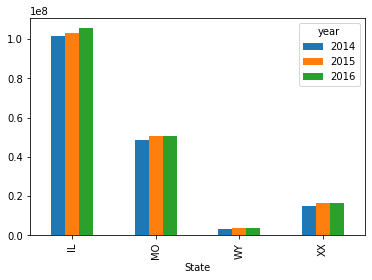

In [128]:
%matplotlib inline
answer.plot.bar()